In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('heart.csv')


Number of features: 14
Classification or regression problem: Classification
Number of data points: 1025
Types of features: Quantitative and Categorical
Correlation of all the features:


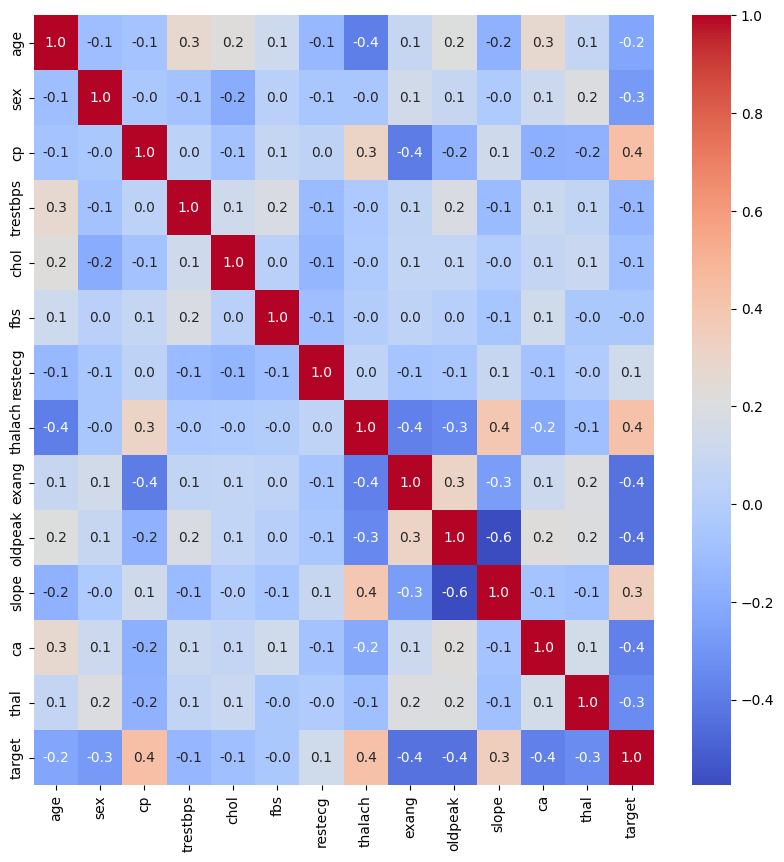

In [ ]:

print('Number of features:', data.shape[1])
print('Classification or regression problem: Classification')
print('Number of data points:', data.shape[0])
print('Types of features: Quantitative and Categorical')
print('Correlation of all the features:')
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',fmt='.1f')
plt.show()

Unique classes and their instances:
1    526
0    499
Name: target, dtype: int64


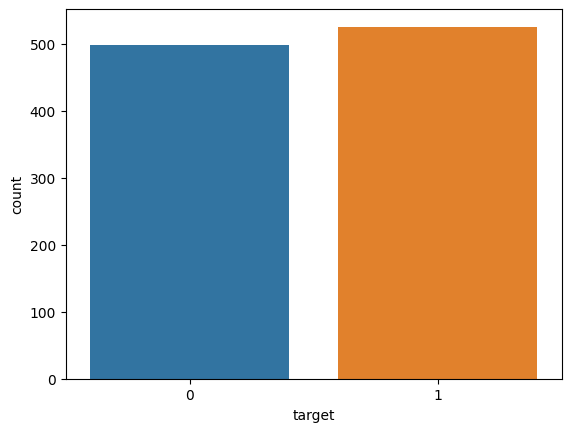

In [ ]:

print('Unique classes and their instances:')
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.show()

In [ ]:

print('Checking for NULL values:')
print(data.isnull().sum())
print('Checking for Categorical values:')
print(data.select_dtypes(include=['object']).columns)

Checking for NULL values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Checking for Categorical values:
Index([], dtype='object')


In [ ]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoder = OneHotEncoder()

encoder.fit(data[cat_cols])

cat_features = encoder.transform(data[cat_cols]).toarray()

data_encoded = pd.concat([data.drop(cat_cols, axis=1), pd.DataFrame(cat_features)], axis=1)

print(data_encoded.head())

   age  trestbps  chol  thalach  oldpeak  target    0    1    2    3  ...  \
0   52       125   212      168      1.0       0  0.0  1.0  1.0  0.0  ...   
1   53       140   203      155      3.1       0  0.0  1.0  1.0  0.0  ...   
2   70       145   174      125      2.6       0  0.0  1.0  1.0  0.0  ...   
3   61       148   203      161      0.0       0  0.0  1.0  1.0  0.0  ...   
4   62       138   294      106      1.9       0  1.0  0.0  1.0  0.0  ...   

    15   16   17   18   19   20   21   22   23   24  
0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 31 columns]


In [ ]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42, stratify=data.iloc[:, -1])


LogisticRegression
Accuracy on train data: 0.8647140864714087
RandomForestClassifier
Accuracy on train data: 1.0
GaussianNB
Accuracy on train data: 0.8242677824267782
LogisticRegression
Accuracy for test data: 0.8181818181818182
Precision for test data: 0.7833333333333333
Recall for test data: 0.8924050632911392
Confusion Matrix: [[111  39]
 [ 17 141]]


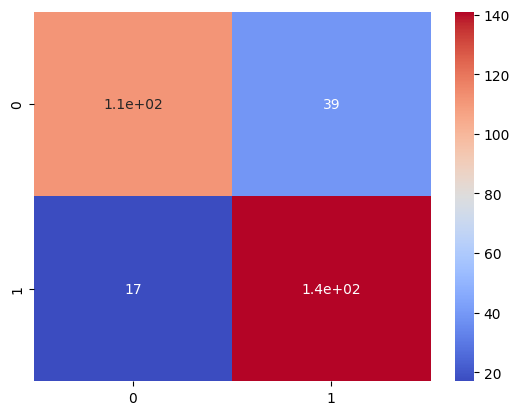

RandomForestClassifier
Accuracy for test data: 0.9805194805194806
Precision for test data: 1.0
Recall for test data: 0.9620253164556962
Confusion Matrix: [[150   0]
 [  6 152]]


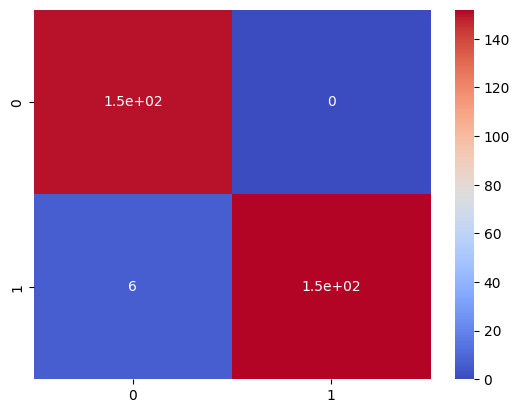

GaussianNB
Accuracy for test data: 0.8344155844155844
Precision for test data: 0.8364779874213837
Recall for test data: 0.8417721518987342
Confusion Matrix: [[124  26]
 [ 25 133]]


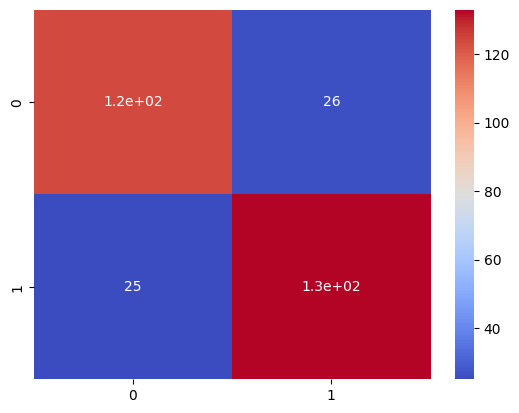

In [ ]:
models = [LogisticRegression(), RandomForestClassifier(), GaussianNB()]
accuracies_train = []
accuracies = []
precisions = []
recalls = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    X_train_prediction = clf.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    accuracies_train.append(training_data_accuracy)
    print(clf.__class__.__name__)
    print('Accuracy on train data:', training_data_accuracy)

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)
    print(clf.__class__.__name__)
    print('Accuracy for test data:', accuracy)
    print('Precision for test data:', precision)
    print('Recall for test data:', recall)
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
    plt.show()

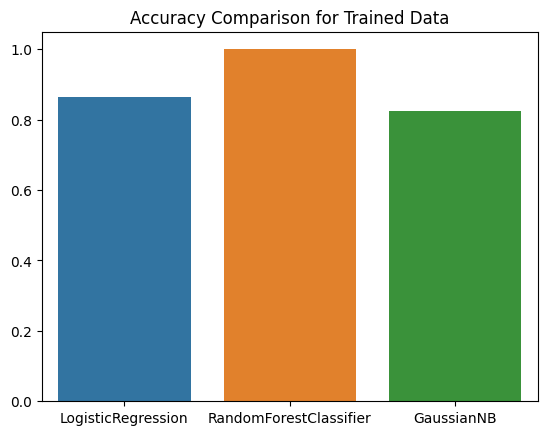

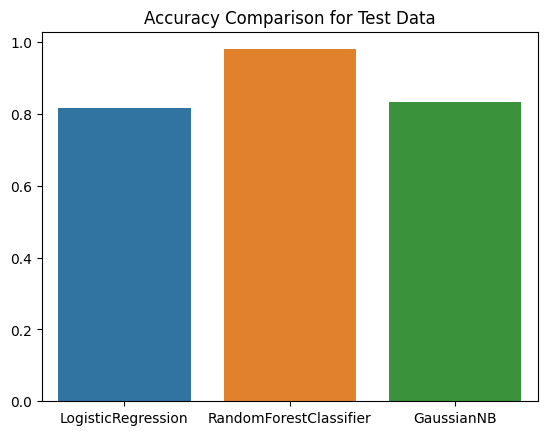

In [ ]:
sns.barplot(x=[clf.__class__.__name__ for clf in models], y=accuracies_train)
plt.title('Accuracy Comparison for Trained Data')
plt.show()

sns.barplot(x=[clf.__class__.__name__ for clf in models], y=accuracies)
plt.title('Accuracy Comparison for Test Data')
plt.show()

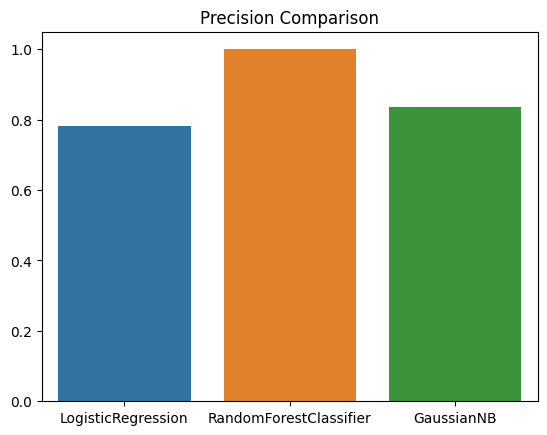

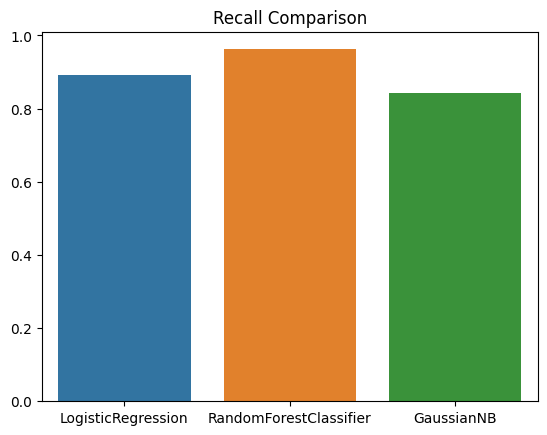

In [ ]:
# Precision, recall comparison of each model
sns.barplot(x=[clf.__class__.__name__ for clf in models], y=precisions)
plt.title('Precision Comparison')
plt.show()
sns.barplot(x=[clf.__class__.__name__ for clf in models], y=recalls)
plt.title('Recall Comparison')
plt.show()

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

for clf in models:
  print(clf.__class__.__name__)
  prediction = clf.predict(input_data_reshaped)
  if (prediction[0]== 0):
      print('The Person does not have a Heart Disease\n')
  else:
      print('The Person has Heart Disease\n')

LogisticRegression
The Person does not have a Heart Disease

RandomForestClassifier
The Person does not have a Heart Disease

GaussianNB
The Person does not have a Heart Disease



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
